In [284]:
# Import numpy for math operations and containers.
# Import matplotlib.pyplot for visual plotting.
# Import copy for copying.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
np.set_printoptions(threshold=np.inf)

In [285]:
# Define training data.

                       # [age, height cm]
trainingFeatures = np.array([[15, 50],
                            [20, 60],
                            [10, 100],
                            [10, 150],
                            [15, 80],
                            [15, 175],
                            [17, 150],
                            [20, 150],
                            [20, 175],
                            [22, 125],
                            [20, 100],
                            [13, 120],
                            [12, 140],
                            [12, 60],
                            [13, 70],
                            [22, 50],
                            [12, 110],
                            [18, 130],
                            [17, 170],
                            [10, 120],
                            [16, 100],
                            [18, 90],
                            [21, 90],
                            [18, 70],
                            [22, 160],
                            [18, 160],
                            [10, 80],
                            [18, 60],
                            [14, 110],
                            [19, 80],
                            [18, 50],
                            [15, 150],
                            [14, 160],
                            [19, 110],
                            [12, 80]])

                     # [bIsManly]
trainingResults = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])
"""
# Define training data.

                       # [age, height cm]
trainingFeatures = np.array([[15, 50],
                            [20, 50],
                            [10, 100],
                            [10, 150],
                            [15, 100],
                            [15, 175],
                            [17, 150],
                            [20, 150],
                            [20, 175],
                            [22, 125]])

                     # [bIsManly]
trainingResults = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
"""

'\n# Define training data.\n\n                       # [age, height cm]\ntrainingFeatures = np.array([[15, 50],\n                            [20, 50],\n                            [10, 100],\n                            [10, 150],\n                            [15, 100],\n                            [15, 175],\n                            [17, 150],\n                            [20, 150],\n                            [20, 175],\n                            [22, 125]])\n\n                     # [bIsManly]\ntrainingResults = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])\n'

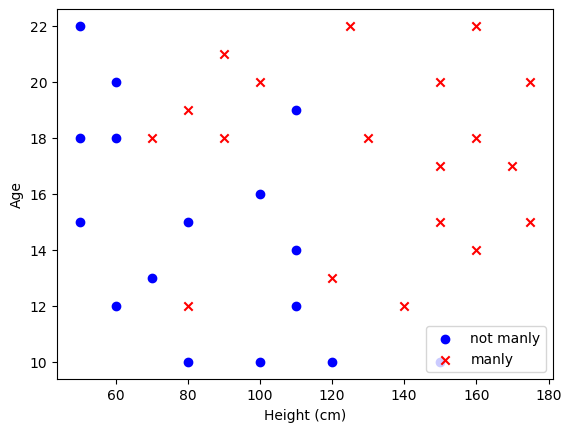

In [286]:
# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

plt.scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
plt.scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

plt.ylabel('Age')
plt.xlabel('Height (cm)')
plt.legend(loc='lower right')

plt.show()

In [287]:
# Define sigmoid function.

def sigmoid(z):
    # input :
    # z [scalar] - Parameter for the sigmoid function.
    # returns :
    # [scalar] - Result of sigmoid function.
    
    return 1 / (1 + np.exp(-1 * z))

In [288]:
# Define prediction function.

def predict(X, w, b):
    # input :
    # X [ndarray : Shape(n,)] - Data with n features to predict result for.
    # w [ndarray : Shape(n,)] - Weights with n values required for proper prediction.
    # b [scalar] - Bias required for proper prediction.
    # returns:
    # [scalar] - Predicted outcome (chance for true).
    
    dotPlusb = np.dot(X, w) + b
    pred = sigmoid(dotPlusb)
    
    return pred

In [289]:
# Define loss function.

def loss(x, w, b, y):
    # input :
    # x [ndarray : Shape(n,)] - Data with n features to predict loss for.
    # w [ndarray : Shape(n,)] - Weights with n values used in finding loss for this given x data.
    # b [scalar] - Bias used in finding loss for this given x data.
    # y [scalar] - Proper result needed for calculating loss for given x.
    # returns:
    # [scalar] - Amount of loss for given x with given w and b.
    
    return (-1 * y * np.log(predict(x, w, b))) - ((1 - y) * np.log(1 - predict(x, w, b)))

In [290]:
# Define cost function.
# It's just a sum of losses divided by number of training examples.
# It's goal is to find how bad are the given weights and bias.

def compute_cost(X, w, b, Y):
    # input :
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns:
    # [scalar] - Cost for given weights and bias.
    
    # Get number of examples.
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        cost += loss(X[i], w, b, Y[i])
        
    cost /= m
    
    return cost

In [291]:
# Define gradient computation.

def compute_gradient(X, w, b, Y):
    # input:
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns: 
    # dj_dw [ndarray : Shape(n,)] - Gradient of current weights.
    # dj_db [scalar] - Gradient of current bias.
    
    # Get the shape of training data.
    m,n = X.shape
    
    # Init n weights with zeros.
    dj_dw = np.zeros((n,))
    
    # Init bias with 0.
    dj_db = 0
    
    # Loop over all examples.
    for i in range(m):
        
        err = predict(X[i], w, b) - Y[i]
        
        # Loop over all features.
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
            
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [292]:
def z_score_normalization(X):
    # params:
    # X [ndarray : Shape (n, m)] - Training dataset with multiple features.
    # returns:
    # X_norm [ndarray : Shape (n, m)] - Z-score normalized dataset.
    
    # Find mu and sigma.
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    # Use mu and sigma to do a element-based calculations to normalize whole dataset.
    X_norm = (X - mu) / sigma
    
    return X_norm

In [293]:
def polynomial_feature(X, degree):
    """
    Performs feature engineering by transforming the dataset into higher polynomial features.
    
    Args:
        X (ndarray): Input dataset with shape (n_samples, n_features).
        degree (int): Degree of the polynomial features.
        
    Returns:
        ndarray: Transformed dataset with shape (n_samples, n_new_features).
    """
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly[:, 1:]  # Exclude the first column (bias term)

In [294]:
# Define training function.

def train_logistic_regression(X, Y, w_start, b_start, alpha, num_iter):
    # inputs:
    # X [ndarray : Shape(m,n)] - Training data.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # w_start [ndarray : Shape(n,)] - Starting weights.
    # b_start [scalar] - Starting bias.
    # alpha [scalar] - Step size.
    # num_iter [scalar] - Number of iterations.
    # returns:
    # weights [ndarray : Shape(n,)] - Trained weights for n-features.
    # bias [scalar] - Trained bias.
    # cost_history [ndarray : Shape(num_iter,)] - History of cost during training.
    
    weights = copy.deepcopy(w_start)
    bias = b_start
    cost_history = np.zeros((num_iter,))
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(X, weights, bias, Y)
        
        weights = weights - alpha * dj_dw
        bias = bias - alpha * dj_db
        cost_history[i] = compute_cost(X, weights, bias, Y)
        
        if(i % 100 == 0):
            print(f'Cost at iteration {i} : {cost_history[i]}')
    
    return weights, bias, cost_history

In [306]:
# Do the training.

degree = 4
trainigFeatures_poly = polynomial_feature(z_score_normalization(trainingFeatures), degree)

m = trainigFeatures_poly.shape[1]
weights_start = np.ones((m,))

# Perform training.
trained_weights, trained_bias, cost_history = train_logistic_regression(trainigFeatures_poly, trainingResults, weights_start, 0.01, 0.5, 5000)

print(f'found weights: {trained_weights}, found bias: {trained_bias}')

Cost at iteration 0 : nan
Cost at iteration 100 : 0.2700626152266016
Cost at iteration 200 : 0.24233021012704695
Cost at iteration 300 : 0.22262130031438643
Cost at iteration 400 : 0.20754711184594538
Cost at iteration 500 : 0.19559403859728328
Cost at iteration 600 : 0.1858184226052518
Cost at iteration 700 : 0.17758055218436597
Cost at iteration 800 : 0.17045435963613562
Cost at iteration 900 : 0.16416065159547408
Cost at iteration 1000 : 0.15851305944391056
Cost at iteration 1100 : 0.15338252951468745
Cost at iteration 1200 : 0.148676261891221
Cost at iteration 1300 : 0.14432532748360824
Cost at iteration 1400 : 0.14027714403483765
Cost at iteration 1500 : 0.1364907010061736
Cost at iteration 1600 : 0.1329334027909129
Cost at iteration 1700 : 0.12957890911831318
Cost at iteration 1800 : 0.12640561604775769
Cost at iteration 1900 : 0.12339556316436341
Cost at iteration 2000 : 0.12053363263519193
Cost at iteration 2100 : 0.11780695293710523
Cost at iteration 2200 : 0.11520444897544588

In [307]:
# Predict for training dataset.

m = trainingFeatures.shape[0]

predicted_trainingData = predict(trainigFeatures_poly, trained_weights, trained_bias)

for i in range(m) :
    print(f"prediction for (age, height): ({trainingFeatures[i, 0]}, {trainingFeatures[i, 1]}): {predicted_trainingData[i]}")

prediction for (age, height): (15, 50): 1.0794437162899127e-14
prediction for (age, height): (20, 60): 0.0644211790004642
prediction for (age, height): (10, 100): 1.5312889004766509e-06
prediction for (age, height): (10, 150): 1.983946492627137e-07
prediction for (age, height): (15, 80): 0.1523614252699792
prediction for (age, height): (15, 175): 0.9999995637331323
prediction for (age, height): (17, 150): 0.999993882041341
prediction for (age, height): (20, 150): 0.9999999997032298
prediction for (age, height): (20, 175): 1.0
prediction for (age, height): (22, 125): 0.9881936329292167
prediction for (age, height): (20, 100): 0.9155694618632289
prediction for (age, height): (13, 120): 0.7640795882598471
prediction for (age, height): (12, 140): 0.9994023643094558
prediction for (age, height): (12, 60): 0.0015669932030250076
prediction for (age, height): (13, 70): 0.09518963587273646
prediction for (age, height): (22, 50): 4.007290501786766e-16
prediction for (age, height): (12, 110): 0.1

In [308]:
# Plot a decision boundary.

def plot_decision_boundary(degree, trained_weights, trained_bias):
    
    # Scatter plot the training data.
    group0 = trainingFeatures[trainingResults == 0]
    group1 = trainingFeatures[trainingResults == 1]

    plt.scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
    plt.scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

    plt.ylabel('Age')
    plt.xlabel('Height (cm)')
    plt.legend(loc='lower right')

    age_min, age_max = trainingFeatures[:, 0].min() - 1, trainingFeatures[:, 0].max() + 1
    height_min, height_max = trainingFeatures[:, 1].min() - 10, trainingFeatures[:, 1].max() + 10
    
    step = 0.1

    age_range = np.arange(age_min, age_max + step, step)
    height_range = np.arange(height_min, height_max + step, step)

    meshgrid = np.meshgrid(age_range, height_range)
    meshgridReshaped = np.array(meshgrid).T.reshape(-1, 2)

    X_poly_mesh = polynomial_feature(z_score_normalization(meshgridReshaped), degree)

    Z = predict(X_poly_mesh, trained_weights, trained_bias)
    Z = Z.reshape(len(age_range), len(height_range))

    plt.ylabel('Age')
    plt.xlabel('Height (cm)')
    plt.contourf(height_range, age_range, Z, cmap='RdBu', alpha=0.8)
    plt.colorbar()

    plt.show()

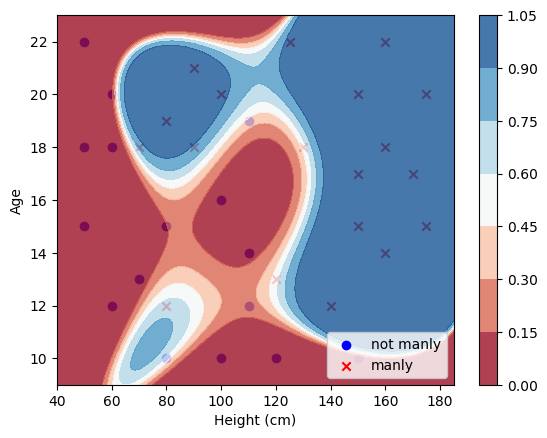

In [309]:
plot_decision_boundary(degree, trained_weights, trained_bias)

In [250]:
# We can clearly see the model is overfitting - trying too hard to match the training data. We can ease those lines out using generalization.

In [310]:
# Add categorization to cost function.

def compute_cost_reg(X, w, b, Y, lambda_):
    # input :
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns:
    # [scalar] - Cost for given weights and bias.
    
    # Get number of examples.
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        cost += loss(X[i], w, b, Y[i])
        
    cost /= m
    
    reg_sum = 0
    
    # Get number of features.
    n = X.shape[1]
    
    for j in range(n):
        reg_sum += (w[j] ** 2)
        
    reg_sum = (lambda_ / (2 * m)) * reg_sum
    
    cost += reg_sum 
    
    return cost

In [311]:
# Add generalization to gradient computation.

def compute_gradient_reg(X, w, b, Y, lambda_):
    # input:
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns: 
    # dj_dw [ndarray : Shape(n,)] - Gradient of current weights.
    # dj_db [scalar] - Gradient of current bias.
    
    # Get the shape of training data.
    m,n = X.shape
    
    # Init n weights with zeros.
    dj_dw = np.zeros((n,))
    
    # Init bias with 0.
    dj_db = 0
    
    # Loop over all examples.
    for i in range(m):
        
        err = predict(X[i], w, b) - Y[i]
        
        # Loop over all features.
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
            
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    for j in range(n):
        dj_dw[j] += ((lambda_ / m) * w[j])
    
    return dj_dw, dj_db

In [312]:
# Define training function with regularization.

def train_logistic_regression_reg(X, Y, w_start, b_start, alpha, num_iter, lambda_):
    # inputs:
    # X [ndarray : Shape(m,n)] - Training data.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # w_start [ndarray : Shape(n,)] - Starting weights.
    # b_start [scalar] - Starting bias.
    # alpha [scalar] - Step size.
    # num_iter [scalar] - Number of iterations.
    # returns:
    # weights [ndarray : Shape(n,)] - Trained weights for n-features.
    # bias [scalar] - Trained bias.
    # cost_history [ndarray : Shape(num_iter,)] - History of cost during training.
    
    weights = copy.deepcopy(w_start)
    bias = b_start
    cost_history = np.zeros((num_iter,))
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient_reg(X, weights, bias, Y, lambda_)
        
        weights = weights - alpha * dj_dw
        bias = bias - alpha * dj_db
        cost_history[i] = compute_cost_reg(X, weights, bias, Y, lambda_)
        
        if(i % 100 == 0):
            print(f'Cost at iteration {i} : {cost_history[i]}')
    
    return weights, bias, cost_history

In [333]:
# Do the training with regularization.

# Perform training.
trained_weights, trained_bias, cost_history = train_logistic_regression_reg(trainigFeatures_poly, trainingResults, weights_start, 0.01, 0.5, 5000, 0.3)

print(f'found weights: {trained_weights}, found bias: {trained_bias}')

Cost at iteration 0 : nan
Cost at iteration 100 : 0.3074726089276283
Cost at iteration 200 : 0.2932742337887764
Cost at iteration 300 : 0.28976055850586535
Cost at iteration 400 : 0.2888261861510692
Cost at iteration 500 : 0.28856154257711764
Cost at iteration 600 : 0.28848307446798466
Cost at iteration 700 : 0.28845900445631506
Cost at iteration 800 : 0.2884514115102555
Cost at iteration 900 : 0.28844895575528723
Cost at iteration 1000 : 0.28844814306494804
Cost at iteration 1100 : 0.2884478684112714
Cost at iteration 1200 : 0.2884477738254353
Cost at iteration 1300 : 0.28844774071035056
Cost at iteration 1400 : 0.28844772895201953
Cost at iteration 1500 : 0.28844772472733
Cost at iteration 1600 : 0.2884477231945554
Cost at iteration 1700 : 0.2884477226339959
Cost at iteration 1800 : 0.28844772242765887
Cost at iteration 1900 : 0.2884477223513078
Cost at iteration 2000 : 0.2884477223229342
Cost at iteration 2100 : 0.28844772231235305
Cost at iteration 2200 : 0.2884477223083954
Cost at

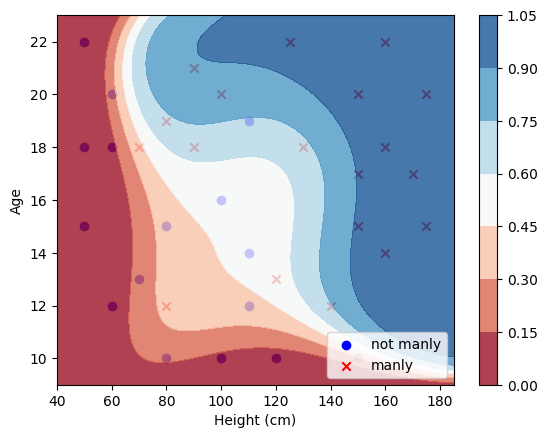

In [334]:
plot_decision_boundary(degree, trained_weights, trained_bias)

In [ ]:
# As we can see, the regularization prevented overfitting and gave us a much better decision boundary.